In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta

data_path = os.getcwd() + '/dados' # precisa limpar o cabecalho desses arquivos

from ES3 import * 
os.listdir(data_path)[0]

'SIMCOSTA_RJ-1_OCEAN_2015-07-29_2016-10-13.csv'

In [2]:
dado = trata_dado(data_path + '/' + os.listdir(data_path)[0])

In [3]:
teste_serie_temporal(dado)

Foram encontradas 19614 falhas na serie temporal.


[]

In [4]:
dado.mean() + 4*dado.std()

Hsig              3.439455
TP               21.330230
Avg_Wv_Dir      251.887186
Avg_Wv_Dir_N    236.645626
M_Decl          -22.495049
dtype: float64

In [5]:
dado

,Hsig,TP,Avg_Wv_Dir,Avg_Wv_Dir_N,M_Decl
DATA,,,,,
2015-07-29 20:25:00,0.79,8.7,178.0,155.45,-22.55
2015-07-29 21:25:00,0.84,9.1,178.0,155.45,-22.55
2015-07-29 22:25:00,0.85,8.3,172.0,149.45,-22.55
2015-07-29 23:25:00,0.84,10.0,167.0,144.45,NaN
2015-07-30 00:25:00,0.81,8.3,171.0,148.45,-22.55
...,...,...,...,...,...
2016-10-13 09:25:00,1.16,13.3,171.0,148.33,-22.67
2016-10-13 09:55:00,0.83,12.5,170.0,147.33,-22.67
2016-10-13 10:25:00,1.05,11.8,171.0,148.33,-22.67


In [6]:
evento_extremo(dado)

In [7]:
aproveitamento(dado, 'Hsig')

De 19553 valores, 49 foram marcados com a flag de pulo (0.25%).
5 valores foram marcados com a flag de crise (0.03%).


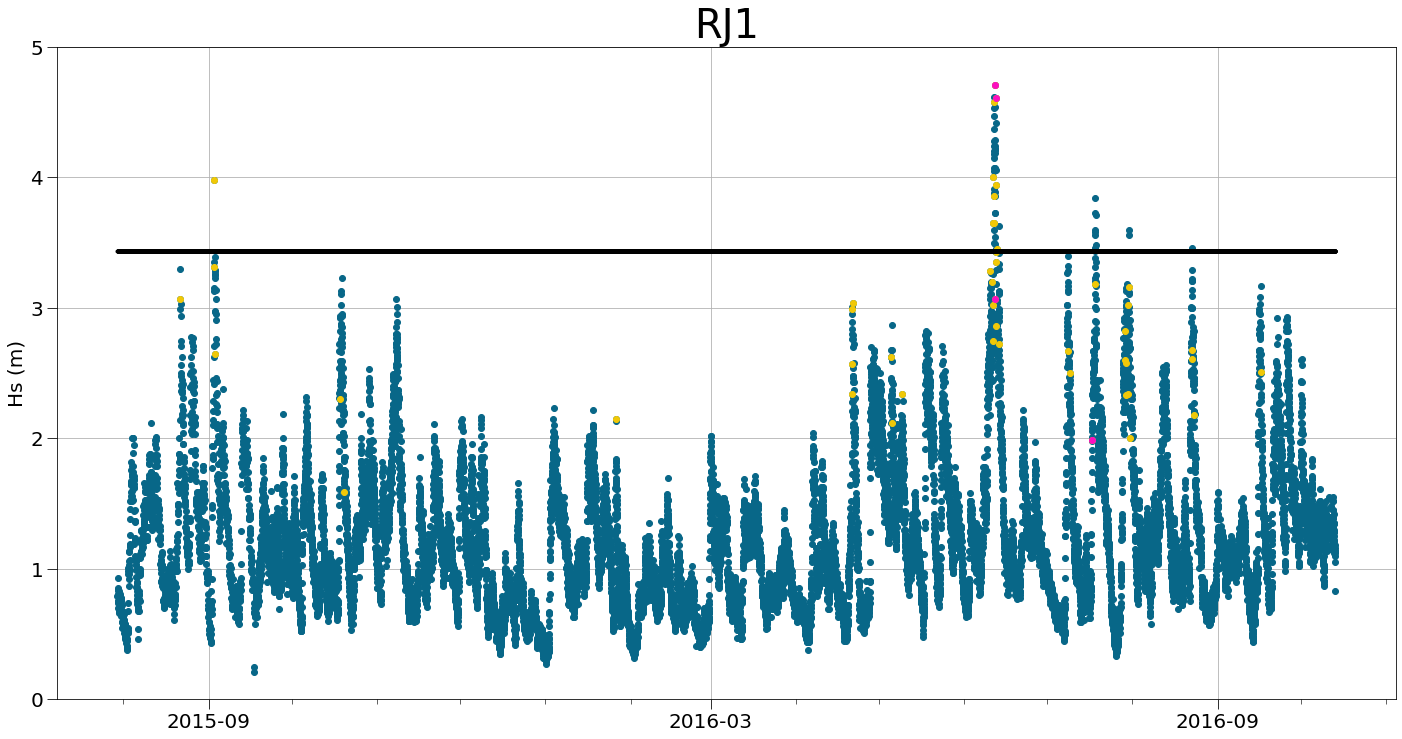

In [8]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(24,12))

ax = fig.add_subplot(111)
ax.plot(dado['Hsig'][:], marker = 'o', color = '#086788', linestyle = 'none')
ax.plot(dado['jump_flag'][:], marker = 'o', color = '#F0C808', linestyle = 'none')
ax.plot(dado['jump_crisis'][:], marker = 'o', color = '#FC0FC0', linestyle = 'none')
# ax.plot(serie4['Hsig'][:], marker = 'o', color = 'purple', linestyle = 'none')


ax.plot(dado['EE_Hsig'][:], marker = '.', color = 'black', linestyle = 'none')
#ax.plot(dado['jump_flag'][:], marker = 'o', color = 'yellow', linestyle = 'none')
#ax.plot(dado['jump_crisis'][:], marker = 'o', color = 'red', linestyle = 'none')

#plt.axhline(y=2.980402, color='blue', linestyle='-') # limite de evento extremo

ax.grid()
ax.set_ylabel('Hs (m)', fontsize = 20)

################################# data #######################

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


ax.tick_params(axis='both', which='major', labelsize=20, size=10)
ax.tick_params(axis='both', which='minor', size=5)

ax.set_ylim(0,5)
# ax.set_xlim(datetime(2016,5,1), datetime(2021,10,1))



###########################################################################

plt.title('RJ1', fontsize = 40)



plt.savefig(os.getcwd() +'/fig/RJ1')

In [9]:
from windrose import WindroseAxes

In [10]:
dado_limpo = dado[dado['jump_flag'].isnull()]

In [11]:
ws = dado_limpo['Hsig']
wd = dado_limpo['Avg_Wv_Dir_N']

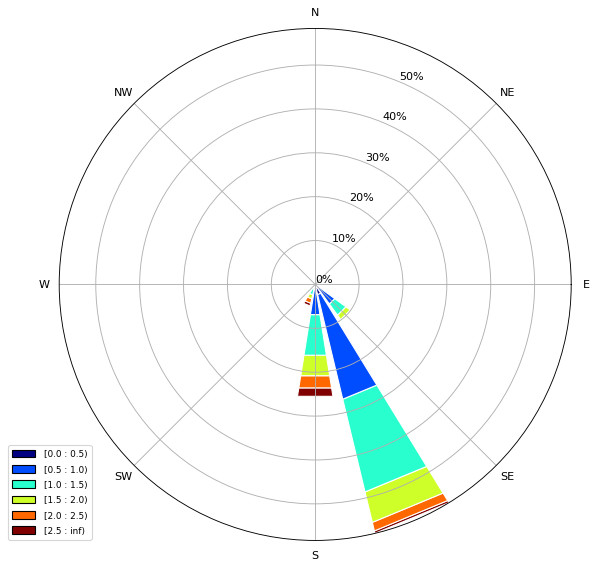

In [12]:
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white', bins = np.arange(0,3,0.5))
ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

ax.set_yticks(np.arange(0, 60, step=10))
y_ticks = []
y_ticks_aux = np.arange(0, 60, step=10)
for j in (y_ticks_aux):
    y_ticks.append(str(j) + '%')
ax.set_yticklabels(y_ticks)
ax.set_legend(loc =(-0.1,0))

plt.savefig(os.getcwd() +'/fig/RJ1_rosaHs')

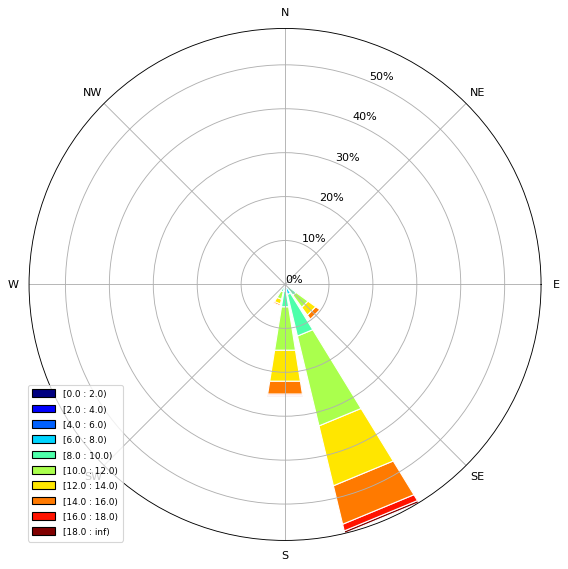

In [13]:
ws = dado_limpo['TP']


ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white', bins = np.arange(0,20,2))
# ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white', bins = np.arange(0,20,2))
ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

ax.set_yticks(np.arange(0, 60, step=10))
y_ticks = []
y_ticks_aux = np.arange(0, 60, step=10)
for j in (y_ticks_aux):
    y_ticks.append(str(j) + '%')
ax.set_yticklabels(y_ticks)
    
    
    
ax.set_legend()

plt.savefig(os.getcwd() +'/fig/RJ1_rosaTp')